In [598]:
# imports
import scipy
#import xarray

import panel as pn
from panel.interact import interact
#pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pandas_profiling import ProfileReport
import sweetviz
import dtale
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import seaborn as sns

In [599]:
# Read the movies_dataset into a Pandas DataFrame
file_path = Path("./Data")
imdb_data = pd.read_csv(f"{file_path}/movie_metadata.csv", index_col='title_year',parse_dates=True,encoding= 'unicode_escape')
annual_ticket_sales = pd.read_csv(f"{file_path}/AnnualTicketSales.csv",parse_dates=True)
highest_grossers = pd.read_csv(f"{file_path}/HighestGrossers.csv",parse_dates=True)
popular_creative_types = pd.read_csv(f"{file_path}/PopularCreativeTypes.csv",parse_dates=True)
top_distributors = pd.read_csv(f"{file_path}/TopDistributors.csv",parse_dates=True)
top_genres = pd.read_csv(f"{file_path}/TopGenres.csv",parse_dates=True)
top_grossing_ratings = pd.read_csv(f"{file_path}/TopGrossingRatings.csv",parse_dates=True)
top_grossing_sources = pd.read_csv(f"{file_path}/TopGrossingSources.csv",parse_dates=True)
top_production_methods = pd.read_csv(f"{file_path}/TopProductionMethods.csv",parse_dates=True)
wide_release_count = pd.read_csv(f"{file_path}/WideReleasesCount.csv",parse_dates=True)
highest_grossers.head(50)

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,"$253,367,455","$430,583,644","4,70,06,948"
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,"$300,404,434","$486,166,890","5,30,74,988"
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,"$403,706,375","$636,480,273","6,94,84,746"
8,2003,Finding Nemo,Adventure,G,Walt Disney,"$339,714,367","$516,050,346","5,63,37,374"
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,"$441,226,247","$650,826,473","7,10,50,925"


In [600]:
imdb_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
title_year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,936.0,7.9,1.78,33000
2007-01-01,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,5000.0,7.1,2.35,0
2015-01-01,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,393.0,6.8,2.35,85000
2012-01-01,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,23000.0,8.5,2.35,164000
NaT,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [601]:
top_genres.head(50)

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%
5,6,Horror,716,"$13,430,378,699","$18,757,512",5.65%
6,7,Romantic Comedy,630,"$10,480,124,374","$16,635,118",4.41%
7,8,Musical,201,"$4,293,988,317","$21,363,126",1.81%
8,9,Documentary,"2,415","$2,519,513,142","$1,043,277",1.06%
9,10,Black Comedy,213,"$2,185,433,323","$10,260,250",0.92%


In [602]:
highest_grossers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  24 non-null     object
 3   MPAA RATING            27 non-null     object
 4   DISTRIBUTOR            27 non-null     object
 5   TOTAL FOR YEAR         27 non-null     object
 6   TOTAL IN 2019 DOLLARS  27 non-null     object
 7   TICKETS SOLD           27 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.8+ KB


In [603]:
# annual_ticket_sales_copy['TOTAL BOX OFFICE'] = annual_ticket_sales_copy['TOTAL BOX OFFICE'].str.replace(',','')
# annual_ticket_sales_copy['TOTAL BOX OFFICE'] = annual_ticket_sales_copy['TOTAL BOX OFFICE'].str.replace('$','')

# annual_ticket_sales_copy['TOTAL BOX OFFICE'] = annual_ticket_sales_copy['TOTAL BOX OFFICE'].astype(int)

In [604]:
highest_grossers['TOTAL FOR YEAR'] = highest_grossers['TOTAL FOR YEAR'].str.replace(',','')

In [605]:
highest_grossers['TOTAL FOR YEAR'] = highest_grossers['TOTAL FOR YEAR'].str.replace('$','')

In [606]:
highest_grossers['TOTAL FOR YEAR'] = highest_grossers['TOTAL FOR YEAR'].astype(int)

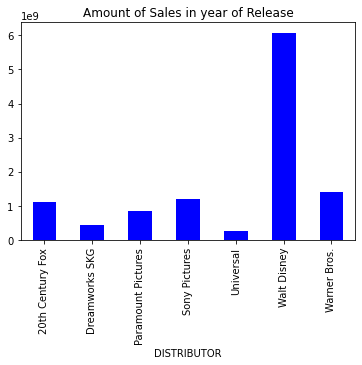

In [607]:
films = highest_grossers.groupby(by = ['DISTRIBUTOR'] )['TOTAL FOR YEAR'].sum().plot(kind = 'bar' , color = "blue" , title = 'Amount of Sales in year of Release')

In [608]:
highest_grossers['TOTAL IN 2019 DOLLARS'] = highest_grossers['TOTAL IN 2019 DOLLARS'].str.replace(',','')


In [609]:
highest_grossers['TOTAL IN 2019 DOLLARS'] = highest_grossers['TOTAL IN 2019 DOLLARS'].str.replace('$','')

In [610]:
highest_grossers['TOTAL IN 2019 DOLLARS'] = highest_grossers['TOTAL IN 2019 DOLLARS'].astype(int)

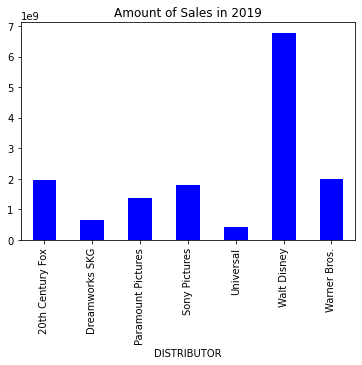

In [611]:
films = highest_grossers.groupby(by = ['DISTRIBUTOR'] )['TOTAL IN 2019 DOLLARS'].sum().plot(kind = 'bar' , color = "blue" , title = 'Amount of Sales in 2019')

In [612]:
highest_grossers['Genre_Action'] = ''
highest_grossers['Genre_Adventure'] = ''
highest_grossers['Genre_Drama'] = ''


In [613]:
#for i in range(len(highest_grossers['GENRE'])):
    # if highest_grossers['GENRE'][i].__contains__("Action"):
       #  highest_grossers['GENRE_Action'][i]="Action"
        
    # if highest_grossers['GENRE'][i].__contains__("Adventure"):
        # highest_grossers['GENRE_Adventure'][i]="Adventure"
      
           
   # if highest_grossers['GENRE'][i].__contains__("Drama"):
       # highest_grossers['GENRE_Drama'][i]="Drama"
    
    

In [614]:
# We can use melt function to make our dataframe more tidy

# It unpivots our table and reduces our column number

In [615]:
film = highest_grossers.melt(id_vars = ['YEAR','MOVIE','MPAA RATING','DISTRIBUTOR','TICKETS SOLD','TOTAL FOR YEAR','TOTAL IN 2019 DOLLARS'],value_name = "GENRE")

In [616]:
#Getting rid of empty cell in Genre column

In [617]:
for i in range(len(film['GENRE'])):
    if film['GENRE'][i] == "":
        film = film.drop(index = i, axis = 0)  

In [618]:
film.isnull().sum()

YEAR                     0
MOVIE                    0
MPAA RATING              0
DISTRIBUTOR              0
TICKETS SOLD             0
TOTAL FOR YEAR           0
TOTAL IN 2019 DOLLARS    0
variable                 0
GENRE                    3
dtype: int64

In [619]:
film[film['GENRE'].isnull()]

,YEAR,MOVIE,MPAA RATING,DISTRIBUTOR,TICKETS SOLD,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,variable,GENRE
24,2019,Avengers: Endgame,PG-13,Walt Disney,"9,37,08,843",858373000,858373002,GENRE,NaN
25,2020,Bad Boys For Life,R,Sony Pictures,"2,23,16,359",204417855,204417848,GENRE,NaN
26,2021,Shang-Chi and the Legend of the Ten Rings,PG-13,Walt Disney,"2,44,78,897",224226704,224226704,GENRE,NaN


In [620]:
film.shape

(27, 9)

In [621]:
film = film.dropna()

In [622]:
film.dropna(how='any',thresh=1).shape

(24, 9)

In [623]:
film.head(27)

,YEAR,MOVIE,MPAA RATING,DISTRIBUTOR,TICKETS SOLD,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,variable,GENRE
0,1995,Batman Forever,PG-13,Warner Bros.,"4,23,06,002",184031112,387522978,GENRE,Drama
1,1996,Independence Day,PG-13,20th Century Fox,"6,92,69,062",306169255,634504608,GENRE,Adventure
2,1997,Men in Black,PG-13,Sony Pictures,"5,46,07,854",250650052,500207943,GENRE,Adventure
3,1998,Titanic,PG-13,Paramount Pictures,"9,45,24,324",443319081,865842808,GENRE,Adventure
4,1999,Star Wars Ep. I: The Phantom Menace,PG,20th Century Fox,"8,47,32,942",430443350,776153749,GENRE,Adventure
5,2000,How the Grinch Stole Christmas,PG,Universal,"4,70,06,948",253367455,430583644,GENRE,Adventure
6,2001,Harry Potter and the Sorcerer’s Stone,PG,Warner Bros.,"5,30,74,988",300404434,486166890,GENRE,Adventure
7,2002,Spider-Man,PG-13,Sony Pictures,"6,94,84,746",403706375,636480273,GENRE,Adventure
8,2003,Finding Nemo,G,Walt Disney,"5,63,37,374",339714367,516050346,GENRE,Adventure
9,2004,Shrek 2,PG,Dreamworks SKG,"7,10,50,925",441226247,650826473,GENRE,Adventure


In [624]:
# Using pie chart to illustrate the percentage of different genre in total sale

 # By holding the cursor on each part you can see the amount of total sale

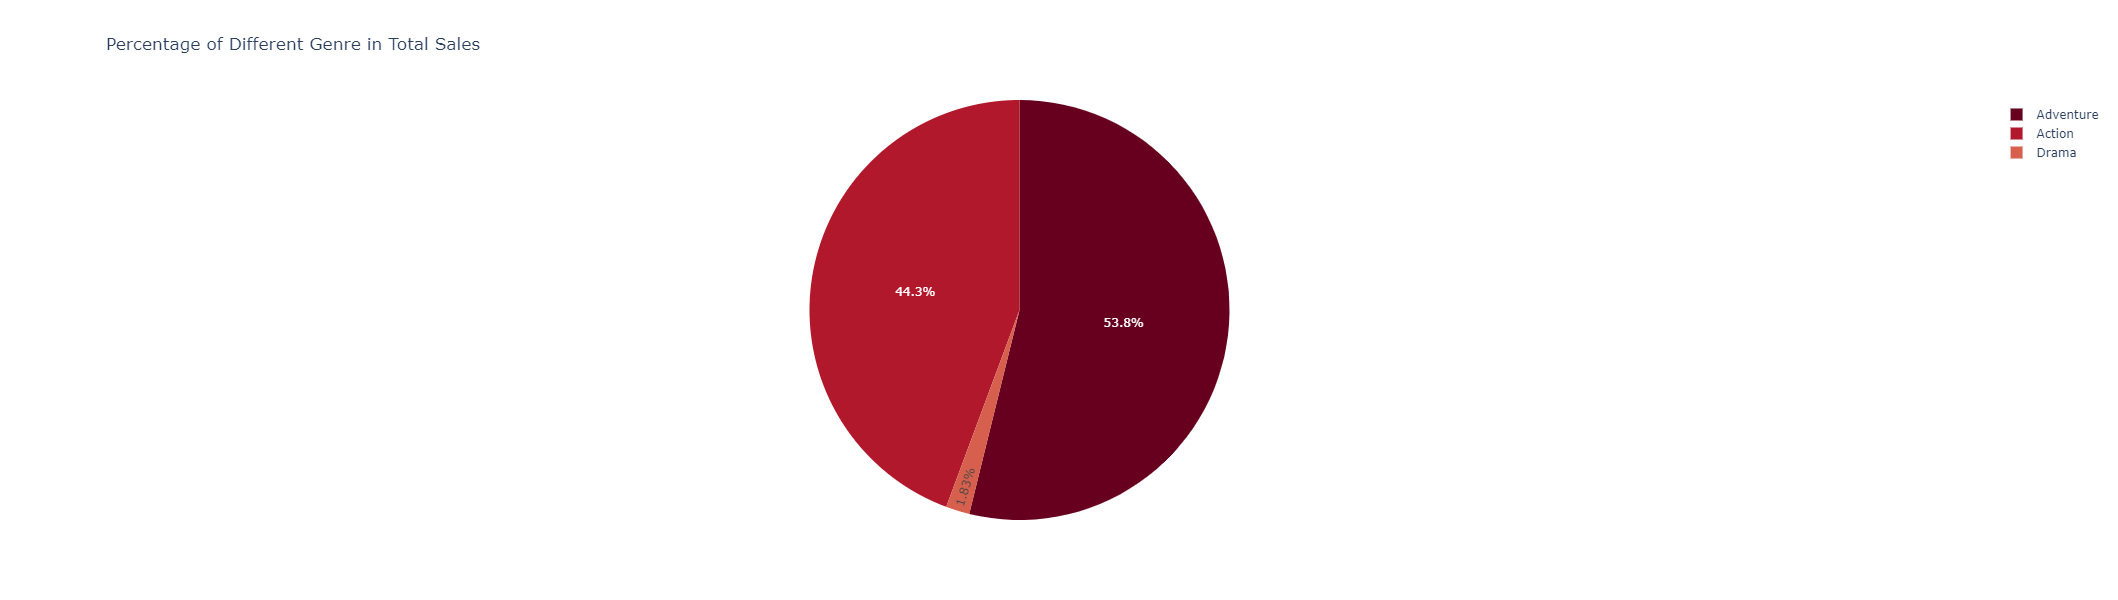

In [625]:
film.groupby(by = ["GENRE"])['TOTAL FOR YEAR'].sum().reset_index()
px.pie(film
       ,values = 'TOTAL FOR YEAR'
       ,names = "GENRE"
       ,title = 'Percentage of Different Genre in Total Sales'
       ,color_discrete_sequence = px.colors.sequential.RdBu
       ,height = 600)


In [626]:
df1 = pd.DataFrame(highest_grossers, columns = ['MOVIE','TOTAL FOR YEAR'])
df1.sort_values(by=['TOTAL FOR YEAR'], ascending = False,inplace=True)

In [627]:
# Top Ten Movies of all time

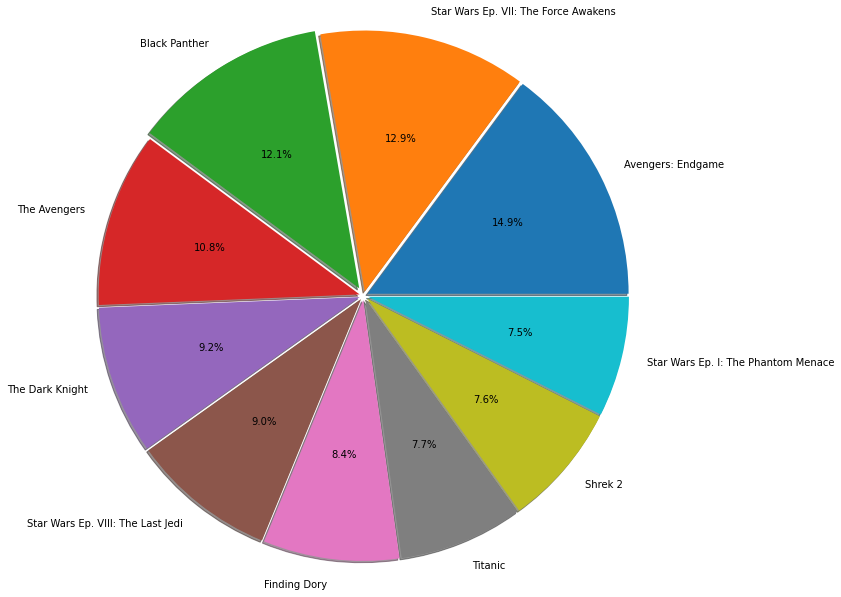

In [628]:
plt.pie(df1['TOTAL FOR YEAR'][0:10],labels = df1['MOVIE'][0:10],autopct='%1.1f%%',explode = (0.05,0.05, 0.1,0.05,0.05,0.05,0.05,0.05,0.05,0.05),radius=3,shadow=True)

plt.show()

In [629]:
# Calculating the Average of Total Sale for each genre by dividing the Total Sale to number of film which are made in that genre

In [630]:
top_genres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%
5,6,Horror,716,"$13,430,378,699","$18,757,512",5.65%
6,7,Romantic Comedy,630,"$10,480,124,374","$16,635,118",4.41%
7,8,Musical,201,"$4,293,988,317","$21,363,126",1.81%
8,9,Documentary,"2,415","$2,519,513,142","$1,043,277",1.06%
9,10,Black Comedy,213,"$2,185,433,323","$10,260,250",0.92%


In [631]:
top_genres['TOTAL GROSS'] = top_genres['TOTAL GROSS'].str.replace(',', '')


In [632]:
top_genres['TOTAL GROSS'] = top_genres['TOTAL GROSS'].str.replace('$', '')

In [633]:
top_genres['TOTAL GROSS'] = top_genres['TOTAL GROSS'].astype('int64')

In [634]:
top_genres.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RANK           10 non-null     int64 
 1   GENRES         10 non-null     object
 2   MOVIES         10 non-null     object
 3   TOTAL GROSS    10 non-null     int64 
 4   AVERAGE GROSS  10 non-null     object
 5   MARKET SHARE   10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes


In [635]:
annual_ticket_sales

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN
5,2016,"1,30,25,56,378","$11,267,115,924","$11,931,416,424",$8.65,NaN
6,2015,"1,32,33,56,776","$11,155,900,636","$12,121,948,075",$8.43,NaN
7,2014,"1,25,74,02,920","$10,272,985,008","$11,517,810,744",$8.17,NaN
8,2013,"1,33,91,68,926","$10,887,446,341","$12,266,787,382",$8.13,NaN
9,2012,"1,38,09,21,942","$10,992,141,616","$12,649,244,986",$7.96,NaN


In [636]:
annual_ticket_sales.isnull().sum()

YEAR                                    0
TICKETS SOLD                            0
TOTAL BOX OFFICE                        0
TOTAL INFLATION ADJUSTED BOX OFFICE     0
AVERAGE TICKET PRICE                    0
Unnamed: 5                             27
dtype: int64

In [637]:
annual_ticket_sales['TOTAL BOX OFFICE'] = annual_ticket_sales['TOTAL BOX OFFICE'].str.replace(',', '')
annual_ticket_sales['TOTAL BOX OFFICE'] = annual_ticket_sales['TOTAL BOX OFFICE'].str.replace('$', '')

annual_ticket_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = annual_ticket_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',', '')
annual_ticket_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = annual_ticket_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$', '')

annual_ticket_sales['AVERAGE TICKET PRICE'] = annual_ticket_sales['AVERAGE TICKET PRICE'].str.replace('$', '')

annual_ticket_sales.drop('Unnamed: 5', axis = 1 , inplace = True)

In [638]:
annual_ticket_sales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881",3881777912,3881777912,9.16
1,2020,"22,36,38,958",2048534616,2048534616,9.16
2,2019,"1,22,85,41,629",11253443955,11253444050,9.16
3,2018,"1,31,15,36,128",11948096650,12013670952,9.11
4,2017,"1,22,56,39,761",10993991460,11226860216,8.97


In [678]:
annual_ticket_sales['TOTAL BOX OFFICE'] = annual_ticket_sales['TOTAL BOX OFFICE'].astype('int64')

In [691]:
annual_ticket_sales["TICKETS SOLD"] = annual_ticket_sales["TICKETS SOLD"].astype('string')
annual_ticket_sales['TICKETS SOLD'] = annual_ticket_sales['TICKETS SOLD'].str.replace(',', '')
# annual_ticket_sales['TICKETS SOLD'] = annual_ticket_sales['TICKETS SOLD'].str.replace('$', '')

annual_ticket_sales["TICKETS SOLD"] = annual_ticket_sales["TICKETS SOLD"].astype('int64')

In [692]:
# nnual_ticket_sales['TICKETS SOLD'] = annual_ticket_sales['TICKETS SOLD'].str.replace(',', '')
# annual_ticket_sales['TICKETS SOLD'] = annual_ticket_sales['TICKETS SOLD'].str.replace('$', '')

# annual_ticket_sales["TICKETS SOLD"] = annual_ticket_sales["TICKETS SOLD"].astype('int64')

In [641]:
annual_ticket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   YEAR                                 27 non-null     int64 
 1   TICKETS SOLD                         27 non-null     int64 
 2   TOTAL BOX OFFICE                     27 non-null     object
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object
 4   AVERAGE TICKET PRICE                 27 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


In [693]:
annual_ticket_sales

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97
5,2016,1302556378,11267115924,11931416424,8.65
6,2015,1323356776,11155900636,12121948075,8.43
7,2014,1257402920,10272985008,11517810744,8.17
8,2013,1339168926,10887446341,12266787382,8.13
9,2012,1380921942,10992141616,12649244986,7.96


In [694]:
annual_ticket_sales.isnull().sum()

YEAR                                   0
TICKETS SOLD                           0
TOTAL BOX OFFICE                       0
TOTAL INFLATION ADJUSTED BOX OFFICE    0
AVERAGE TICKET PRICE                   0
dtype: int64

In [643]:
annual_ticket_sales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


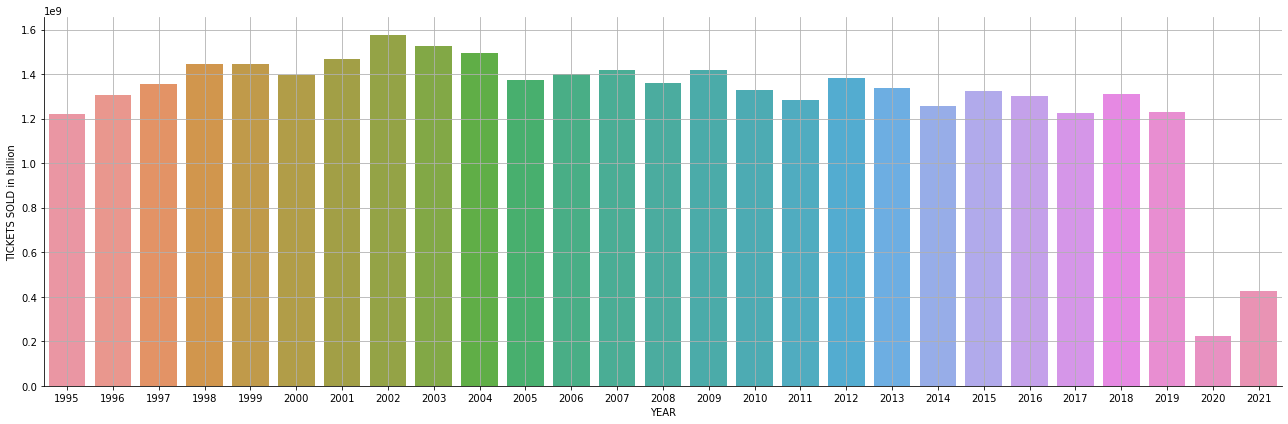

In [695]:
ax = sns.catplot(y="TICKETS SOLD", x="YEAR", kind="bar", data=annual_ticket_sales, height=6, aspect=3)
plt.ylabel("TICKETS SOLD in billion")
plt.grid(True)

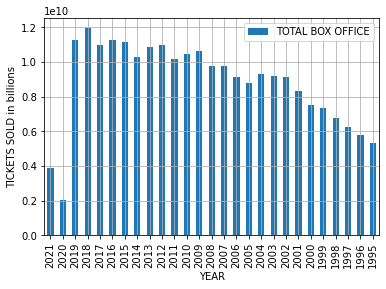

In [724]:
annual_ticket_sales.plot.bar(x='YEAR', y='TOTAL BOX OFFICE')
plt.ylabel("TICKETS SOLD in billions")
plt.grid(True) 

In [697]:
annual_ticket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   YEAR                                 27 non-null     int64 
 1   TICKETS SOLD                         27 non-null     int64 
 2   TOTAL BOX OFFICE                     27 non-null     int64 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object
 4   AVERAGE TICKET PRICE                 27 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [698]:
top_genres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102",64529536530,58556748,27.14%
1,2,Action,"1,098",49339974493,44936224,20.75%
2,3,Drama,"5,479",35586177269,6495013,14.97%
3,4,Comedy,"2,418",33687992318,13932172,14.17%
4,5,Thriller/Suspense,"1,186",19810201102,16703374,8.33%
5,6,Horror,716,13430378699,18757512,5.65%
6,7,Romantic Comedy,630,10480124374,16635118,4.41%
7,8,Musical,201,4293988317,21363126,1.81%
8,9,Documentary,"2,415",2519513142,1043277,1.06%
9,10,Black Comedy,213,2185433323,10260250,0.92%


In [699]:
# top_genres['TOTAL GROSS'] = top_genres['TOTAL GROSS'].str.replace(',', '')
# top_genres['TOTAL GROSS'] = top_genres['TOTAL GROSS'].str.replace('$', '')

# top_genres["TOTAL GROSS"] = top_genres["TOTAL GROSS"].astype('int64')

In [700]:
top_genres

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102",64529536530,58556748,27.14%
1,2,Action,"1,098",49339974493,44936224,20.75%
2,3,Drama,"5,479",35586177269,6495013,14.97%
3,4,Comedy,"2,418",33687992318,13932172,14.17%
4,5,Thriller/Suspense,"1,186",19810201102,16703374,8.33%
5,6,Horror,716,13430378699,18757512,5.65%
6,7,Romantic Comedy,630,10480124374,16635118,4.41%
7,8,Musical,201,4293988317,21363126,1.81%
8,9,Documentary,"2,415",2519513142,1043277,1.06%
9,10,Black Comedy,213,2185433323,10260250,0.92%


In [704]:
# top_genres['AVERAGE GROSS'] = top_genres['AVERAGE GROSS'].str.replace(',', '')
# top_genres['AVERAGE GROSS'] = top_genres['AVERAGE GROSS'].str.replace('$', '')

# top_genres["AVERAGE GROSS"] = top_genres["AVERAGE GROSS"].astype('int64')

Text(0.5, 1.0, 'Popular Genres')

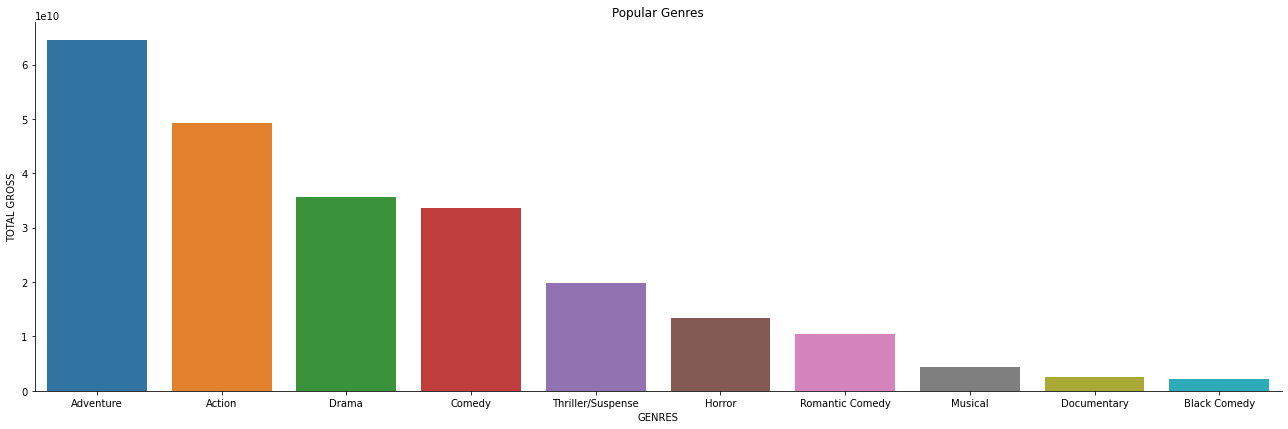

In [720]:
ax = sns.catplot(y="TOTAL GROSS"  , x="GENRES", kind="bar", data=top_genres, height=6, aspect=3)
plt.ylabel("TOTAL GROSS") 
plt.title("Popular Genres")

In [708]:
highest_grossers

,YEAR,MOVIE,GENRE,DISTRIBUTOR,ty,2019,ts,Genre_Action,Genre_Adventure,Genre_Drama
0,1995,Batman Forever,Drama,Warner Bros.,184031112,387522978,42306002,,,
1,1996,Independence Day,Adventure,20th Century Fox,306169255,634504608,69269062,,,
2,1997,Men in Black,Adventure,Sony Pictures,250650052,500207943,54607854,,,
3,1998,Titanic,Adventure,Paramount Pictures,443319081,865842808,94524324,,,
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,20th Century Fox,430443350,776153749,84732942,,,
5,2000,How the Grinch Stole Christmas,Adventure,Universal,253367455,430583644,47006948,,,
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,Warner Bros.,300404434,486166890,53074988,,,
7,2002,Spider-Man,Adventure,Sony Pictures,403706375,636480273,69484746,,,
8,2003,Finding Nemo,Adventure,Walt Disney,339714367,516050346,56337374,,,
9,2004,Shrek 2,Adventure,Dreamworks SKG,441226247,650826473,71050925,,,


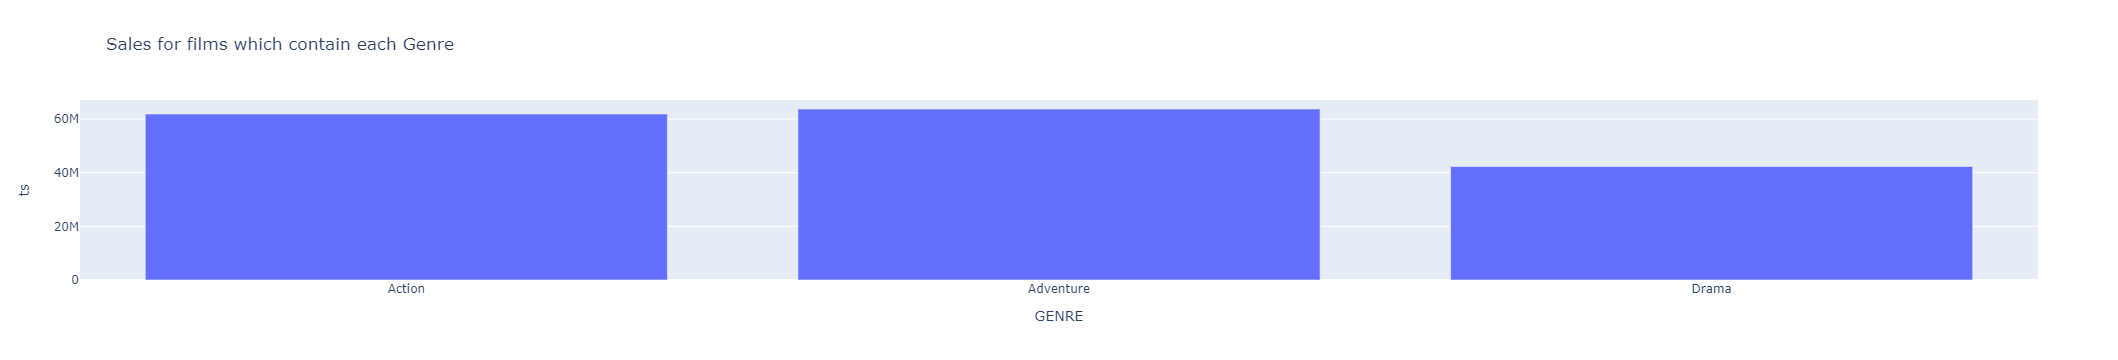

In [714]:
film_sale = highest_grossers.groupby(by = ["GENRE"])['ts'].sum().reset_index()
film_count = highest_grossers.groupby(by = ["GENRE"])['ts'].count().reset_index()
film_ave = (film_sale["ts"] / film_count["ts"]).reset_index()
film_ave['GENRE'] = film_count["GENRE"]
px.bar(film_ave
      ,x ="GENRE"
       , y = "ts"
       ,labels = {"TOTAL FOR YEAR":"Sales For Each Genre"}
      , title = "Sales for films which contain each Genre")

In [707]:
# Visulizing number of films which are made by different distributors in different years

<AxesSubplot:title={'center':'Number of films which are made by different distributors in different years'}, xlabel='DISTRIBUTOR'>

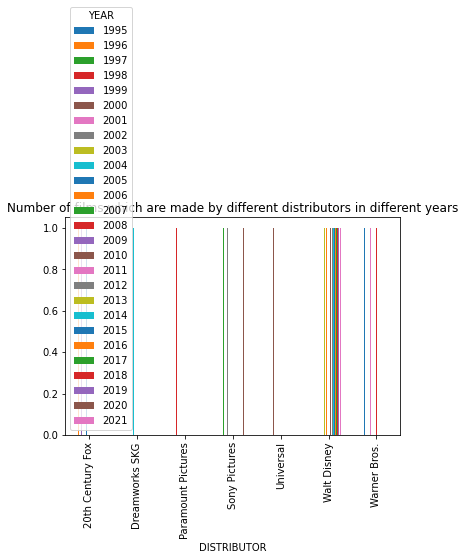

In [656]:
highest_grossers.groupby(by = ['DISTRIBUTOR','YEAR'] )['MOVIE'].count().unstack().plot(kind = 'bar',title = "Number of films which are made by different distributors in different years")

In [657]:
# Illustrating amount of total sale based on different distributors and years

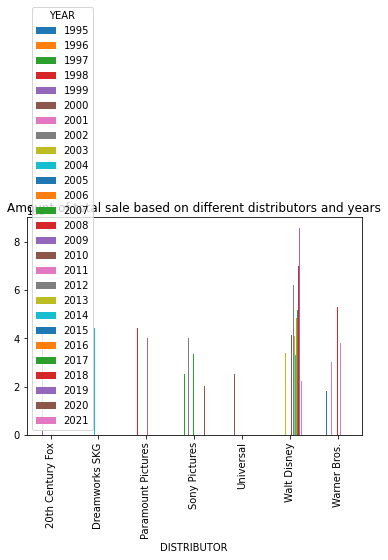

In [658]:
film = highest_grossers.groupby(by = ['DISTRIBUTOR','YEAR'] )['TOTAL FOR YEAR'].sum().unstack().plot(kind = 'bar',title = "Amount of total sale based on different distributors and years")

In [659]:
highest_grossers

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD,Genre_Action,Genre_Adventure,Genre_Drama
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,"4,23,06,002",,,
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,"6,92,69,062",,,
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,"5,46,07,854",,,
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,"9,45,24,324",,,
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,"8,47,32,942",,,
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,"4,70,06,948",,,
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,"5,30,74,988",,,
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,"6,94,84,746",,,
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367,516050346,"5,63,37,374",,,
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,"7,10,50,925",,,


In [660]:
highest_grossers['TICKETS SOLD'] = highest_grossers['TICKETS SOLD'].str.replace(',','')

In [661]:
highest_grossers['TICKETS SOLD'] = highest_grossers['TICKETS SOLD'].astype(int)

In [662]:
highest_grossers

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD,Genre_Action,Genre_Adventure,Genre_Drama
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002,,,
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062,,,
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854,,,
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324,,,
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942,,,
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,47006948,,,
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,53074988,,,
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746,,,
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367,516050346,56337374,,,
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925,,,


In [663]:
type(highest_grossers)

pandas.core.frame.DataFrame

In [664]:
highest_grossers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  24 non-null     object
 3   MPAA RATING            27 non-null     object
 4   DISTRIBUTOR            27 non-null     object
 5   TOTAL FOR YEAR         27 non-null     int32 
 6   TOTAL IN 2019 DOLLARS  27 non-null     int32 
 7   TICKETS SOLD           27 non-null     int32 
 8   Genre_Action           27 non-null     object
 9   Genre_Adventure        27 non-null     object
 10  Genre_Drama            27 non-null     object
dtypes: int32(3), int64(1), object(7)
memory usage: 2.1+ KB


In [665]:
highest_grossers = highest_grossers.drop(['MPAA RATING'], axis=1)

In [666]:
new_names = {'TOTAL FOR YEAR':'ty', 'TOTAL IN 2019 DOLLARS':'2019' , 'TICKETS SOLD':'ts'}

In [667]:
highest_grossers.rename(columns=new_names, inplace=True)
highest_grossers.head()

,YEAR,MOVIE,GENRE,DISTRIBUTOR,ty,2019,ts,Genre_Action,Genre_Adventure,Genre_Drama
0,1995,Batman Forever,Drama,Warner Bros.,184031112,387522978,42306002,,,
1,1996,Independence Day,Adventure,20th Century Fox,306169255,634504608,69269062,,,
2,1997,Men in Black,Adventure,Sony Pictures,250650052,500207943,54607854,,,
3,1998,Titanic,Adventure,Paramount Pictures,443319081,865842808,94524324,,,
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,20th Century Fox,430443350,776153749,84732942,,,


In [668]:
# highest_grossers[['ty','ts','2019']].hist(figsize=14,9)


<function matplotlib.pyplot.show(close=None, block=None)>

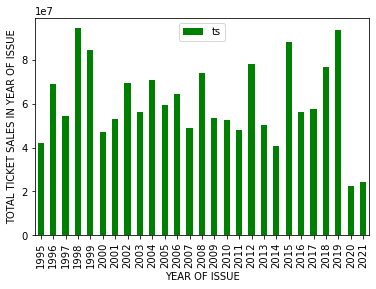

In [727]:
highest_grossers.plot(kind='bar', x='YEAR' , y='ts' , color='green')
plt.xlabel("YEAR OF ISSUE")
plt.ylabel("TOTAL TICKET SALES IN YEAR OF ISSUE")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

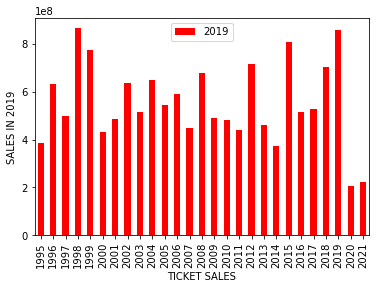

In [670]:
highest_grossers.plot(kind='bar' , x='YEAR' , y='2019', color='red')
plt.xlabel("TICKET SALES")
plt.ylabel("SALES IN 2019")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

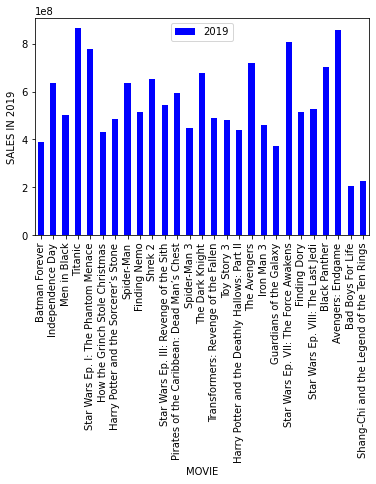

In [671]:
highest_grossers.plot(kind='bar' , x='MOVIE' , y='2019' , color='blue')
plt.xlabel("MOVIE")
plt.ylabel("SALES IN 2019")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

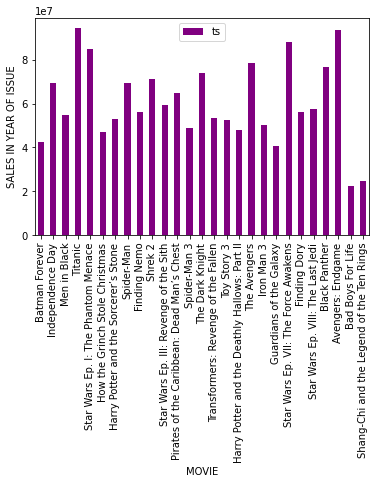

In [672]:
highest_grossers.plot(kind='bar' , x='MOVIE' , y='ts' , color='purple')
plt.xlabel("MOVIE")
plt.ylabel("SALES IN YEAR OF ISSUE")
plt.show

In [685]:
highest_grossers

,YEAR,MOVIE,GENRE,DISTRIBUTOR,ty,2019,ts,Genre_Action,Genre_Adventure,Genre_Drama
0,1995,Batman Forever,Drama,Warner Bros.,184031112,387522978,42306002,,,
1,1996,Independence Day,Adventure,20th Century Fox,306169255,634504608,69269062,,,
2,1997,Men in Black,Adventure,Sony Pictures,250650052,500207943,54607854,,,
3,1998,Titanic,Adventure,Paramount Pictures,443319081,865842808,94524324,,,
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,20th Century Fox,430443350,776153749,84732942,,,
5,2000,How the Grinch Stole Christmas,Adventure,Universal,253367455,430583644,47006948,,,
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,Warner Bros.,300404434,486166890,53074988,,,
7,2002,Spider-Man,Adventure,Sony Pictures,403706375,636480273,69484746,,,
8,2003,Finding Nemo,Adventure,Walt Disney,339714367,516050346,56337374,,,
9,2004,Shrek 2,Adventure,Dreamworks SKG,441226247,650826473,71050925,,,


<function matplotlib.pyplot.show(close=None, block=None)>

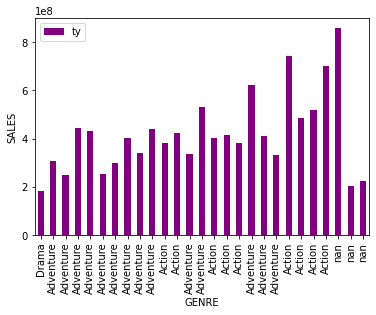

In [744]:
highest_grossers.plot(kind='bar' , x='GENRE' , y='ty' , color='purple')
plt.xlabel("GENRE")
plt.ylabel('SALES') 
# plt.ticklabel_format(style='plain')
plt.show

In [687]:
top_grossing_sources

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,"7,946","$106,375,196,782","$13,387,264",44.74%
1,2,Based on Fiction Book/Short Story,"2,150","$47,005,613,207","$21,863,076",19.77%
2,3,Based on Comic/Graphic Novel,249,"$23,369,989,130","$93,855,378",9.83%
3,4,Remake,328,"$12,832,659,970","$39,123,963",5.40%
4,5,Based on Real Life Events,"3,225","$11,398,356,297","$3,534,374",4.79%
5,6,Based on TV,231,"$11,305,006,312","$48,939,421",4.75%
6,7,Based on Factual Book/Article,295,"$7,443,681,990","$25,232,820",3.13%
7,8,Spin-Off,41,"$3,833,128,331","$93,490,935",1.61%
8,9,Based on Folk Tale/Legend/Fairytale,78,"$3,406,118,495","$43,668,186",1.43%
9,10,Based on Play,271,"$2,111,190,923","$7,790,372",0.89%
